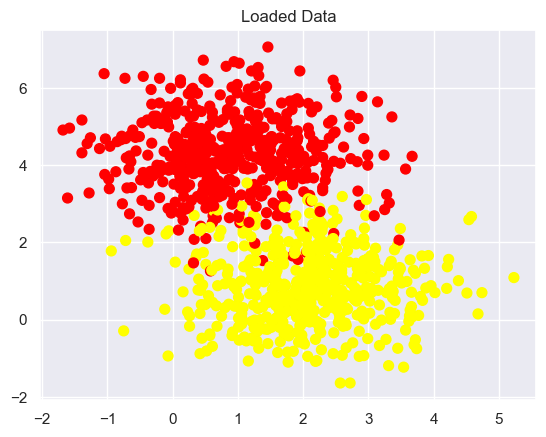

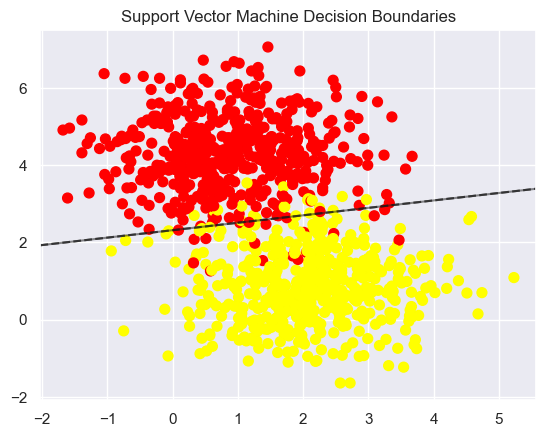

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC

# use seaborn plotting defaults
import seaborn as sns
sns.set()

# Load the data from 'data_SVM.txt'
DATA = np.loadtxt('/Users/student/Documents/ML Work /data/data_SVM.txt')
X = DATA[:, :2]
y = DATA[:, 2]

# Visualize the loaded data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title('Loaded Data')
plt.show()

# Fitting a support vector machine
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# Define the function to plot SVM decision boundaries
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plot the SVM decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.title('Support Vector Machine Decision Boundaries')
plt.show()


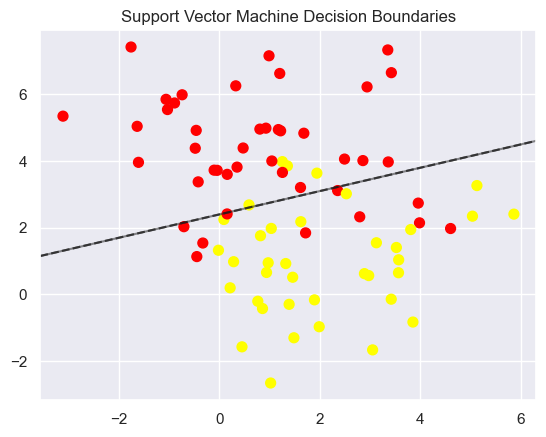

Training Set:
Total number of misclassified points:  14
Percentage of misclassified points: 17.50%

Test Set:
Total number of misclassified points:  3
Percentage of misclassified points: 15.00%

Test Set with C=0.01:
Total number of misclassified points:  3
Percentage of misclassified points: 15.00%

Test Set with C=0.1:
Total number of misclassified points:  3
Percentage of misclassified points: 15.00%

Test Set with C=1.0:
Total number of misclassified points:  3
Percentage of misclassified points: 15.00%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# use seaborn plotting defaults
import seaborn as sns
sns.set()

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.6)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit SVM model with a linear kernel and a very large C parameter
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)

# Visualize the SVM decision boundaries
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.title('Support Vector Machine Decision Boundaries')
plt.show()

# Calculate and print the percentage of misclassified points
y_pred_train = model.predict(X_train)
misclassified_train = np.sum(y_train != y_pred_train)
percentage_misclassified_train = misclassified_train / len(y_train) * 100
print('Training Set:')
print('Total number of misclassified points: ', misclassified_train)
print('Percentage of misclassified points: {:.2f}%'.format(percentage_misclassified_train))

# Apply the model to the test set
y_pred_test = model.predict(X_test)
misclassified_test = np.sum(y_test != y_pred_test)
percentage_misclassified_test = misclassified_test / len(y_test) * 100
print('\nTest Set:')
print('Total number of misclassified points: ', misclassified_test)
print('Percentage of misclassified points: {:.2f}%'.format(percentage_misclassified_test))

# Try the algorithm for a range of different values of C parameter [0.01, 0.1, 1.0]
C_values = [0.01, 0.1, 1.0]
for c in C_values:
    model = SVC(kernel='linear', C=c)
    model.fit(X_train, y_train)
    
    # Apply the model to the test set
    y_pred_test = model.predict(X_test)
    misclassified_test = np.sum(y_test != y_pred_test)
    percentage_misclassified_test = misclassified_test / len(y_test) * 100
    
    print('\nTest Set with C={}:'.format(c))
    print('Total number of misclassified points: ', misclassified_test)
    print('Percentage of misclassified points: {:.2f}%'.format(percentage_misclassified_test))

# Compare SVM results with Perceptron results from week-6 (assuming you have results from the Perceptron)
# Include relevant code for comparison

# Note: You may need to adjust this code based on your specific dataset and how you've implemented the Perceptron.
# If you have specific code from the Perceptron, please provide it for a more accurate comparison.


In [3]:
# Assuming you have already trained the SVM model and have test data (X_test, y_test)
# model = SVC(kernel='linear', C=your_chosen_C_value)  # Ensure you've trained the model first

# Apply the model to the test set
y_pred_test = model.predict(X_test)

# Calculate the number of misclassified points
misclassified_test = np.sum(y_test != y_pred_test)

# Calculate the percentage of misclassified points
percentage_misclassified_test = misclassified_test / len(y_test) * 100

# Print the results
print('Test Set:')
print('Total number of misclassified points: ', misclassified_test)
print('Percentage of misclassified points: {:.2f}%'.format(percentage_misclassified_test))


Test Set:
Total number of misclassified points:  3
Percentage of misclassified points: 15.00%


In [4]:
# Assuming you have training and test data (X_train, y_train, X_test, y_test)
# Create a list of different C values to try
C_values = [0.01, 0.1, 1.0]

# Iterate through different C values
for c in C_values:
    # Train the SVM model with the current C value
    model = SVC(kernel='linear', C=c)
    model.fit(X_train, y_train)

    # Apply the model to the test set
    y_pred_test = model.predict(X_test)

    # Calculate the number of misclassified points
    misclassified_test = np.sum(y_test != y_pred_test)

    # Calculate the percentage of misclassified points
    percentage_misclassified_test = misclassified_test / len(y_test) * 100

    # Print the results for the current C value
    print('\nTest Set with C={}:'.format(c))
    print('Total number of misclassified points: ', misclassified_test)
    print('Percentage of misclassified points: {:.2f}%'.format(percentage_misclassified_test))




Test Set with C=0.01:
Total number of misclassified points:  3
Percentage of misclassified points: 15.00%

Test Set with C=0.1:
Total number of misclassified points:  3
Percentage of misclassified points: 15.00%

Test Set with C=1.0:
Total number of misclassified points:  3
Percentage of misclassified points: 15.00%
